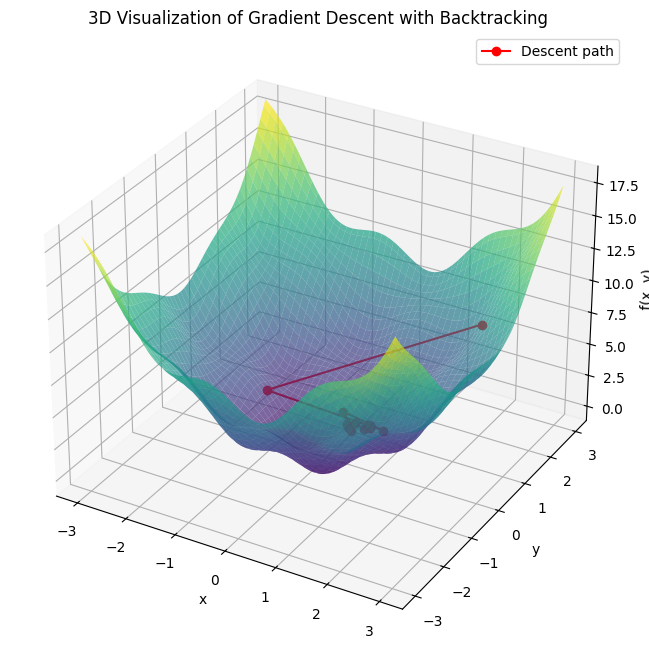

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the new function and its gradient
def f_new(x, y):
    return x**2 + y**2 + np.sin(3 * x) * np.cos(3 * y)

def grad_f_new(x, y):
    # Partial derivatives of f_new with respect to x and y
    df_dx = 2 * x + 3 * np.cos(3 * x) * np.cos(3 * y)
    df_dy = 2 * y - 3 * np.sin(3 * x) * np.sin(3 * y)
    return np.array([df_dx, df_dy])

# Backtracking parameters for the new function
alpha = 0.1
beta = 0.7
t_init = 1.0  # Initial step size
x0 = np.array([2.0, 2.0])  # Starting point

# Storage for plotting
x_values = [x0]

# Perform backtracking line search with gradient descent
for _ in range(20):  # Limit iterations to avoid infinite loops
    t = t_init
    x_prev = x_values[-1]
    grad = grad_f_new(x_prev[0], x_prev[1])
    
    # Check the backtracking condition
    while f_new(x_prev[0] - t * grad[0], x_prev[1] - t * grad[1]) > f_new(x_prev[0], x_prev[1]) - alpha * t * np.dot(grad, grad):
        t *= beta  # Shrink step size
    
    # Update x_k based on the computed step size
    x_new = x_prev - t * grad
    x_values.append(x_new)
    
    # Break if the step is very small (convergence criterion)
    if np.linalg.norm(x_new - x_prev) < 1e-5:
        break

# Convert to arrays for plotting
x_values = np.array(x_values)

# Plotting the 3D surface and the path
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f_new(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

# Plot the descent path
ax.plot(x_values[:, 0], x_values[:, 1], f_new(x_values[:, 0], x_values[:, 1]), 'o-', color='red', label="Descent path")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Visualization of Gradient Descent with Backtracking')
ax.legend()
plt.show()
